Sistema de exoplanetas "escogidos": K2-266

In [78]:
import numpy as np
import matplotlib.pyplot as plt
file = open("Datos2.txt","r")
lineas = file.readlines()
file.close()

In [79]:
header = lineas[0].split()
saltos = lineas[1:]
header

['Planeta', 'Periodo', 'Distancia']

In [80]:
datos = [linea.strip() for linea in saltos]
print(header)
datos

['Planeta', 'Periodo', 'Distancia']


['Mercurio    0.241       0.387',
 'Venus       0.615       0.723',
 'Tierra      1           1',
 'Marte       1.8881      1.524',
 'Jupiter     11.86       5.204',
 'Saturno     29.6        9.58',
 'Urano       83.7        19.14',
 'Neptuno     165.4       30.2']

In [81]:
nombres = []
periodo = []
distancia = []
T_2 = []
a_3 = []
K = [] # Constante de Kepler
for lin in datos:
    nombres.append(lin.split()[0])
    periodo.append(float(lin.split()[1]))
    distancia.append(float(lin.split()[2]))
# for j in periodo:
periodo = np.array(periodo)
distancia = np.array(distancia)

In [82]:
# Minimos cuadrados es de la forma [y_i - (mx_i + b)]^2
# x es una lista, suma de cada valor de x
def sum1(x):
    sum = 0
    for num in x:
        sum += num
    return sum
# Suma de x * y y sumando
def sum2 (x,y):
    sum = 0
    for i in range(len(x)):
        sum += x[i] * y[i]
    return sum
print(distancia)

[ 0.387  0.723  1.     1.524  5.204  9.58  19.14  30.2  ]


In [83]:
# T_2
for i in range(len(datos)):
    c = (periodo[i]**2)
    T_2.append(c)

print(T_2)

# a_3
for i in range(len(datos)):
    c = (distancia[i]**3)
    a_3.append(c)

print(a_3)

# constante
for i in range(len(datos)):
    c = (periodo[i]**2)/(distancia[i]**3)
    K.append(c)

for elem in K:
    print(elem)

[0.058080999999999994, 0.378225, 1.0, 3.5649216099999994, 140.65959999999998, 876.1600000000001, 7005.6900000000005, 27357.160000000003]
[0.057960603000000006, 0.37793306699999996, 1.0, 3.539605824, 140.93272966399996, 879.2179120000001, 7011.739944000001, 27543.607999999997]
1.0020772213153128
1.0007724463019798
1.0
1.00715214836306
0.9980619855682129
0.9965220089829108
0.9991371693690412
0.9932308069443918


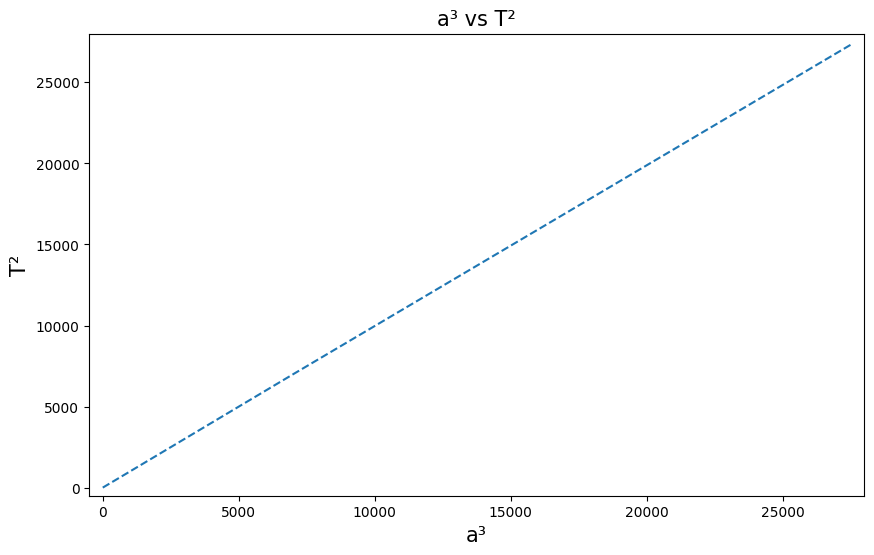

In [84]:
plt.figure(figsize=(10, 6))
plt.plot(a_3, T_2, linestyle = "--")
plt.title("a³ vs T²", fontsize=15)
plt.xlabel("a³", fontsize=15)
plt.ylabel("T²", fontsize=15)
plt.xlim(-500,28000)
plt.ylim(-500,28000)
plt.show()

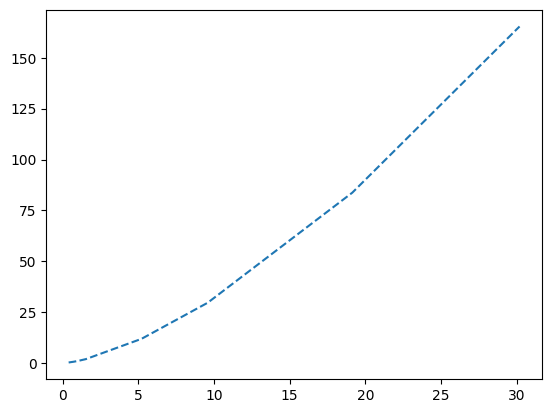

In [85]:
plt.plot(distancia, periodo, linestyle = "--")

In [86]:
x = np.array(a_3)
y = np.array(T_2)

In [87]:
# Pendiente
dat1 = len(periodo)*(np.sum(x*y))-(np.sum(x))*(np.sum(y))
dat2 = len(periodo)*(np.sum(x**2))-((np.sum(x))**2)
m = dat1/dat2
m

0.9933732980352273

In [88]:
# Intercepto
b_1 = (np.sum(y)*np.sum(x**2))-(np.sum(x)*sum2(x,y))
b_2 = len(periodo)*(np.sum(x**2))-((np.sum(x))**2)
b = b_1/b_2
b

4.997242497459398

In [89]:
# Coeficiente de correlación
r_1 = (len(x))*(sum2(x,y)) - (np.sum(x)*np.sum(y))
r_2 = np.sqrt(((len(x)*np.sum(x**2))-(np.sum(x)**2))*((len(y)*np.sum(y**2))-(np.sum(y)**2)))
r = r_1 / r_2
print(r)

0.9999988647983022


In [90]:
# Calcular D
D = np.sum(((x-np.mean(x))**2))
D = np.array(D)
D

array(6.50361472e+08)

In [91]:
# Calcular d
d = y-m*x-b
d = np.array(d)
d_2 = d**2
print(d_2)

[  24.96739077   24.94449199   24.90624602   24.48736324   18.80482432
    4.96772522 1254.40103221   79.60139249]


In [92]:
# Incertidumbre pendiente
inter = ((np.sum(d**2))/(D*((len(x))-2)))
print(inter)
inc_m = np.sqrt(inter)
inc_m

3.7340272295802266e-07


0.0006110668727381829

In [93]:
# incertidumbre intercepto lol
inc_b_ins = ((1/len(x))+((np.mean(x)**2)/D))*(np.sum(d**2)/(len(x)-2))
inc_b = np.sqrt(inc_b_ins)
inc_b

6.143455169711238

In [94]:
# Ecuacion en cuestion

print(f"Ecuacion = {m}x+{b}")
print(f"Ecuacion con valores de incertiidumbre\ny = ({m} +- {inc_m})x + ({b} +- {inc_b})")


Ecuacion = 0.9933732980352273x+4.997242497459398
Ecuacion con valores de incertiidumbre
y = (0.9933732980352273 +- 0.0006110668727381829)x + (4.997242497459398 +- 6.143455169711238)


# Exoplanetas:

In [95]:
file_exo = open("Datos2_exo.txt","r")
lineas_exo = file_exo.readlines()
file_exo.close()
header_exo = lineas_exo[0].split()
saltos_exo = lineas_exo[1:]
datos_exo = [linea.strip() for linea in saltos_exo]
print(header_exo)
datos_exo

['masa_tierra', 'radio_terrestre', 'masa_jupiter', 'radio_jupiter', 'Semieje_mayor(AU)', 'Periodo_Orbital(dias)', 'Tipo_de_estrella_y_masa(M_Solares)', 'tipo_de_planetas', 'planetas_zona_habitable']


['10.90           3.30               0.03            0.29             0.013                0.66                     None                                   neptune-like        n',
 '0.29            0.71               0.00            0.06             0.068                7.81                     K                                      earth-like          n',
 '8.90            2.93               0.03            0.26             0.103                10.46                    0.83                                   neptune-like        n',
 '14.30           2.73               0.04            0.24             0.125                14.76                    None                                   neptune-like        n']

In [96]:
masa_tierra = []
radio_terrestre = []
masa_jupiter = []
radio_jupiter = []
semieje_mayor = []
periodo_orbital = []
tipo_estrella_y_masa = []
tipo_planeta = []
zona_habitable = []
###################
periodo_orbital_años = []

for lin in datos_exo:
    masa_tierra.append(float(lin.split()[0]))
    radio_terrestre.append(float(lin.split()[1]))
    masa_jupiter.append(float(lin.split()[2]))
    radio_jupiter.append(float(lin.split()[3]))
    semieje_mayor.append(float(lin.split()[4]))
    periodo_orbital.append(float(lin.split()[5]))
    tipo_estrella_y_masa.append(lin.split()[6])
    tipo_planeta.append(lin.split()[7])
    zona_habitable.append(lin.split()[8])

periodo_orbital = np.array(periodo_orbital)

for i in range(len(periodo_orbital)):
    x = periodo_orbital[i] / 365
    periodo_orbital_años.append(x)

print(periodo_orbital_años)

[0.0018082191780821918, 0.021397260273972603, 0.028657534246575345, 0.040438356164383564]


In [97]:
eje_exo = np.array(semieje_mayor)
periodo_exo = np.array(periodo_orbital_años)
T_2_exo = []
a_3_exo = []
K_exo = []
# T_2
for i in range(len(datos_exo)):
    c = (periodo_exo[i]**2)
    T_2_exo.append(c)

print(T_2_exo)

# a_3
for i in range(len(datos_exo)):
    c = (eje_exo[i]**3)
    a_3_exo.append(c)

print(a_3_exo)

# constante
for i in range(len(datos_exo)):
    c = (periodo_exo[i]**2)/(eje_exo[i]**3)
    K_exo.append(c)

for elem in K_exo:
    print(elem)

[3.2696565959842375e-06, 0.0004578427472321261, 0.0008212542690936388, 0.0016352606492775381]
[2.197e-06, 0.00031443200000000007, 0.0010927269999999997, 0.001953125]
1.4882369576623748
1.4560946316918315
0.751563994569219
0.8372534524300995


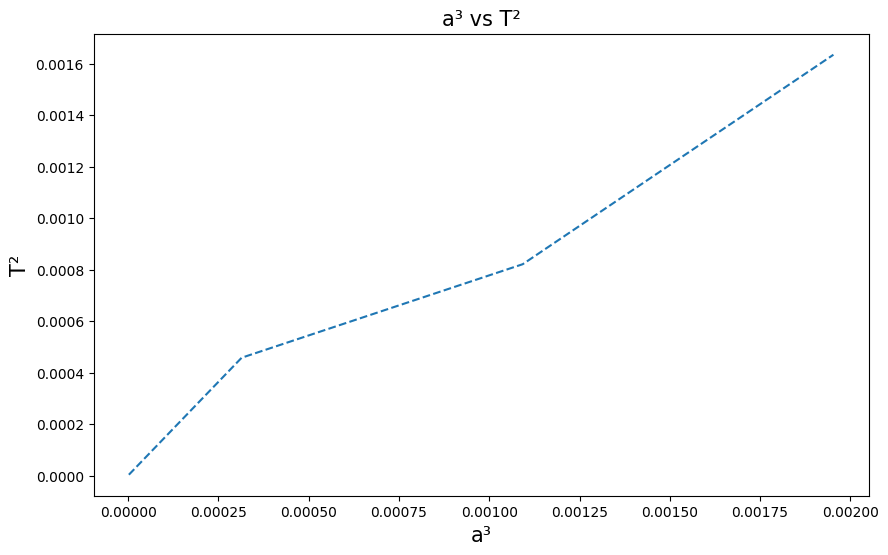

In [98]:
plt.figure(figsize=(10, 6))
plt.plot(a_3_exo, T_2_exo, linestyle = "--")
plt.title("a³ vs T²", fontsize=15)
plt.xlabel("a³", fontsize=15)
plt.ylabel("T²", fontsize=15)
plt.show()

In [99]:
x = np.array(a_3_exo)
y = np.array(T_2_exo)

In [100]:
# Pendiente
dat1_exo = len(eje_exo)*(np.sum(x*y))-(np.sum(x))*(np.sum(y))
dat2_exo = len(eje_exo)*(np.sum(x**2))-((np.sum(x))**2)
m_exo = dat1_exo/dat2_exo
m_exo

0.7814929063184538

In [101]:
# Intercepto
b_1_exo = (np.sum(y)*np.sum(x**2))-(np.sum(x)*sum2(x,y))
b_2_exo = len(eje_exo)*(np.sum(x**2))-((np.sum(x))**2)
b_exo = b_1_exo/b_2_exo
b_exo

7.246806826717651e-05

In [102]:
# Coeficiente de correlación
r_1_exo = (len(x))*(sum2(x,y)) - (np.sum(x)*np.sum(y))
r_2_exo = np.sqrt(((len(x)*np.sum(x**2))-(np.sum(x)**2))*((len(y)*np.sum(y**2))-(np.sum(y)**2)))
r_exo = r_1_exo / r_2_exo
print(r_exo)

0.9870068874810402


In [103]:
# Calcular D
D_exo = np.sum(((x-np.mean(x))**2))
D_exo = np.array(D_exo)
D_exo

array(2.28105225e-06)

In [104]:
# Calcular d
d_exo = y-m_exo*x-b_exo
d_exo = np.array(d_exo)
d_2_exo = d_exo**2
print(d_2_exo)

[5.02898709e-09 1.95016481e-08 1.10611913e-08 1.32781882e-09]


In [105]:
# Incertidumbre pendiente
inter_exo = ((np.sum(d_exo**2))/(D_exo*((len(x))-2)))
print(inter_exo)
inc_m_exo = np.sqrt(inter_exo)
inc_m_exo

0.008092678552455572


0.08995931609597514

In [106]:
# incertidumbre intercepto
inc_b_ins_exo = ((1/len(x))+((np.mean(x)**2)/D))*(np.sum(d_exo**2)/(len(x)-2))
inc_b_exo = np.sqrt(inc_b_ins_exo)
inc_b_exo

6.793346495438416e-05

In [107]:
# Ecuacion en cuestion

print(f"Ecuacion = {m_exo}x+{b_exo}")
print(f"Ecuacion con valores de incertiidumbre\ny = ({m_exo} +- {inc_m_exo})x + ({b_exo} +- {inc_b_exo})")


Ecuacion = 0.7814929063184538x+7.246806826717651e-05
Ecuacion con valores de incertiidumbre
y = (0.7814929063184538 +- 0.08995931609597514)x + (7.246806826717651e-05 +- 6.793346495438416e-05)


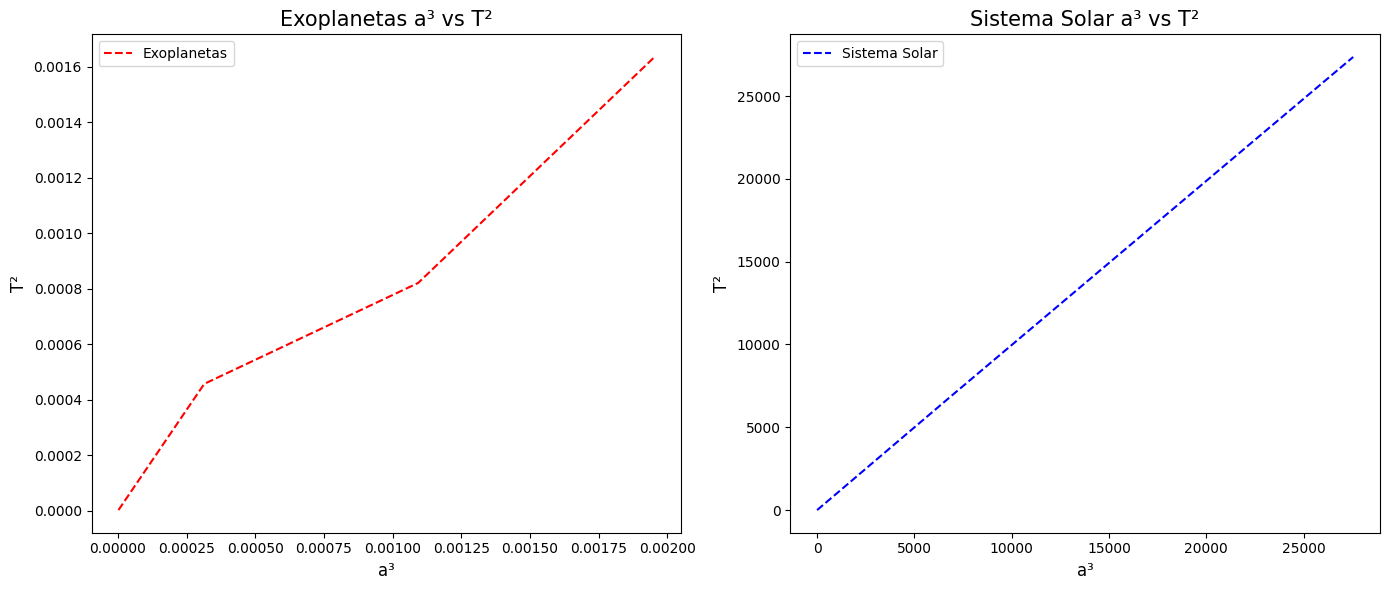

In [108]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.plot(a_3_exo, T_2_exo, linestyle="--", color="red", label="Exoplanetas")
ax1.set_title("Exoplanetas a³ vs T²", fontsize=15)
ax1.set_xlabel("a³", fontsize=12)
ax1.set_ylabel("T²", fontsize=12)
ax1.legend()

ax2.plot(a_3, T_2, linestyle="--", color="blue", label="Sistema Solar")
ax2.set_title("Sistema Solar a³ vs T²", fontsize=15)
ax2.set_xlabel("a³", fontsize=12)
ax2.set_ylabel("T²", fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()

In [109]:
print(K_exo)

[1.4882369576623748, 1.4560946316918315, 0.751563994569219, 0.8372534524300995]
